In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
import numpy as np

# Prophet doesn't support numpy v2
# pip install numpy==1.26.4
np.__version__

'1.26.4'

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv"
)
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [4]:
m = Prophet()
m.fit(df)

22:35:11 - cmdstanpy - INFO - Chain [1] start processing
22:35:11 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [6]:
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.211654    7.516948    8.951144
3266 2017-01-16  8.536682    7.818520    9.313191
3267 2017-01-17  8.324099    7.654451    9.041962
3268 2017-01-18  8.156744    7.468770    8.883134
3269 2017-01-19  8.168699    7.487280    8.942478

/Users/alextanhongpin/Documents/python/python-timeseries/.venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/alextanhongpin/Documents/python/python-timeseries/.venv/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


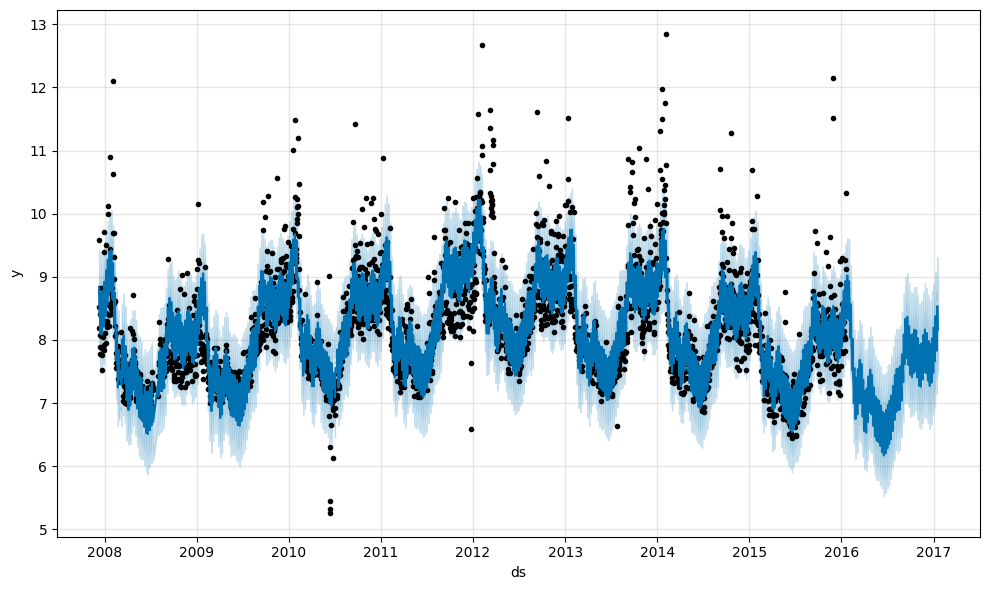

In [7]:
fig1 = m.plot(forecast)

/Users/alextanhongpin/Documents/python/python-timeseries/.venv/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/alextanhongpin/Documents/python/python-timeseries/.venv/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/alextanhongpin/Documents/python/python-timeseries/.venv/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is depre

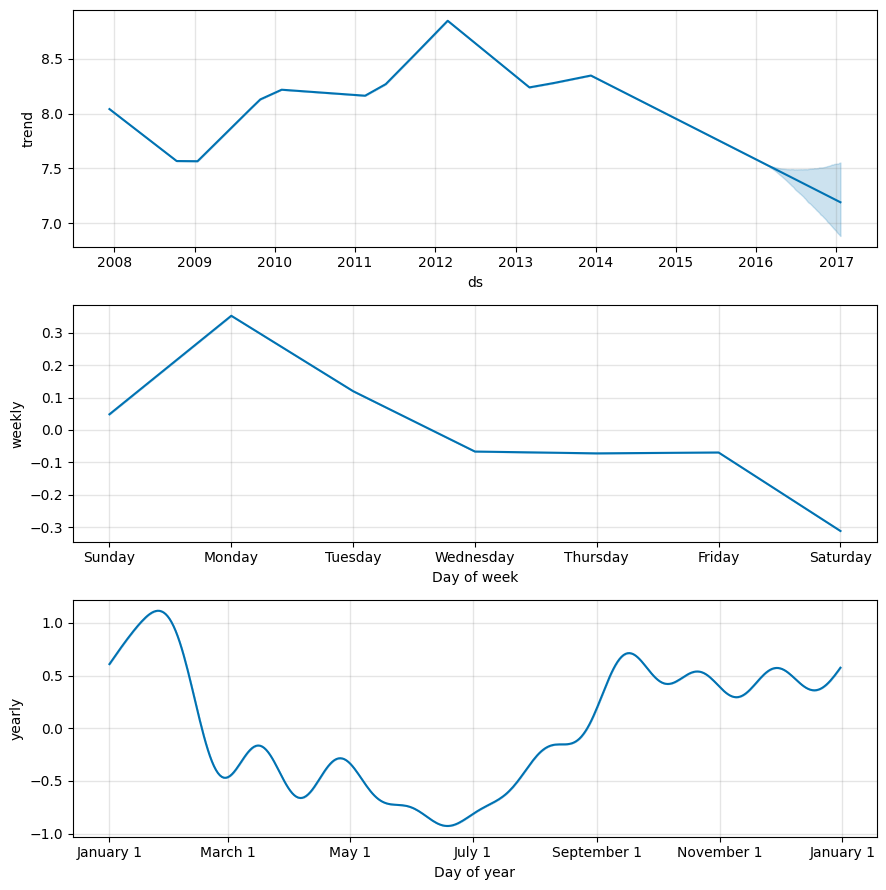

In [8]:
fig2 = m.plot_components(forecast)

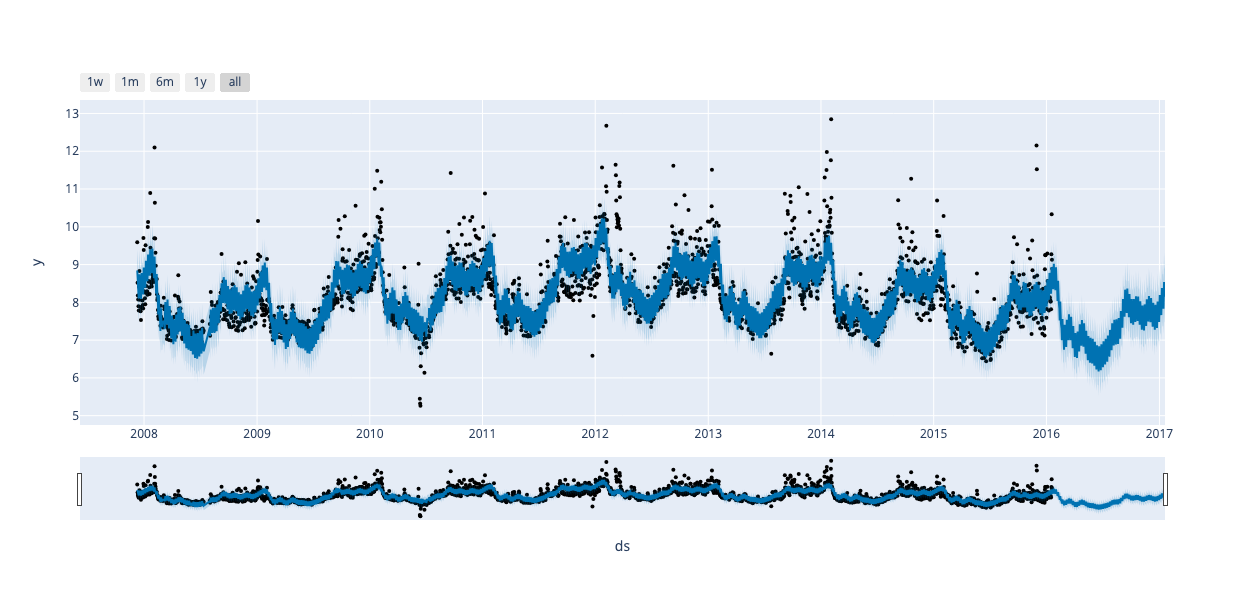

In [9]:
from prophet.plot import plot_components_plotly, plot_plotly

plot_plotly(m, forecast)

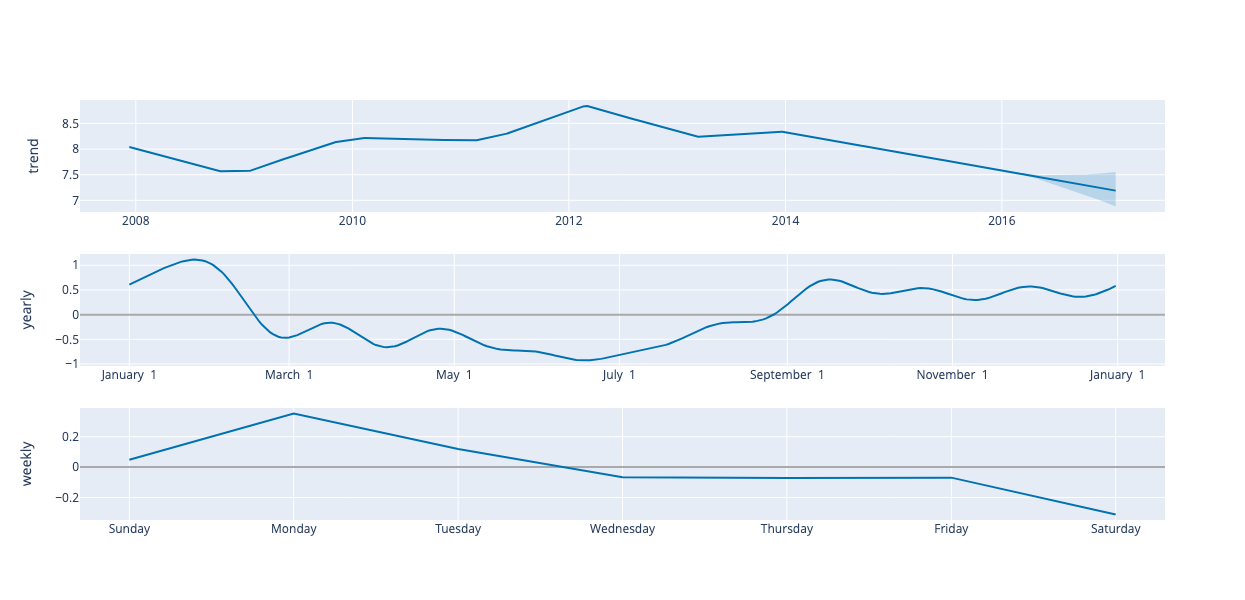

In [10]:
plot_components_plotly(m, forecast)